In [1]:
%load_ext autoreload

%autoreload 2


In [2]:
from IMLCV.configs.config_general import config

config(

    singlepoint_nodes=2,
    walltime="12:00:00",
    bootstrap=False,
    training_cores=16,

)

ROOT_DIR=PosixPath('/kyukon/scratch/gent/vo/000/gvo00003/vsc43693/IMLCV/IMLCV/src/IMLCV')
node
stevin
executor='work_queue'
wall_time_s=14160.0
executor='work_queue'
wall_time_s=42960.0


/kyukon/scratch/gent/vo/000/gvo00003/vsc43693/envs/condaenv/py312/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


executor='work_queue'
wall_time_s=14160.0


/kyukon/scratch/gent/vo/000/gvo00003/vsc43693/envs/condaenv/py312/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


In [19]:
from pathlib import Path

from IMLCV.base.rounds import Rounds
from IMLCV.examples.example_systems import toy_1d
from IMLCV.scheme import Scheme

folder = Path("perovskites")/"toy_muller_brown"
rounds= Rounds.create(folder=folder, copy=False, new_folder=False)


inverting bias
Plotting, dims: [2] muller_brown_ref.png


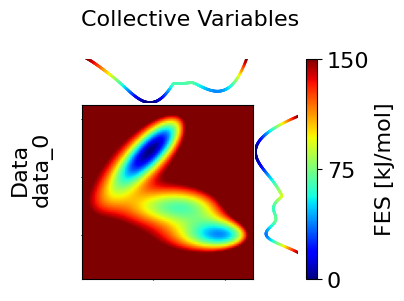

In [ ]:
from IMLCV.examples.example_systems import toy_1d

from IMLCV.base.UnitsConstants import kjmol

_,_,fes = toy_1d()


fes.plot(inverted=True,vmax=150*kjmol,name="muller_brown_ref.png",)

In [28]:
2 ** (1 / 6)

1.122462048309373

c=0 r=2
iterating low=2 high=3 num=1  start=1 stop=2
....................................
setting weights to one!
len(sp) = 36
grid_nums_stack.shape=(36036, 1)
aplying cv func to 18 chunks of size 2000 + remainder of size 36 
start time: 10:55:21.180.compiled f
compiled chunk func
........
time: 10:55:21.390, estimated end time 10:55:21.580:,  10/19:.........recompiled f for last chunk
recompiled chunk func for last chunk

finished at: 10:55:21.483
aplying cv func to 18 chunks of size 2000 + remainder of size 36 
start time: 10:55:21.509.compiled f
compiled chunk func
........
time: 10:55:21.701, estimated end time 10:55:21.874:,  10/19:.........recompiled f for last chunk
recompiled chunk func for last chunk

finished at: 10:55:21.794
selected 36036 out of 36036 data points len(out_reweights)=36 len(out_rhos)=36
len(out_sp) = 36 


Plotting, dims: [2] perovskites/toy_muller_brown/cv_0/bias_2.png
Plotting, dims: [2] perovskites/toy_muller_brown/cv_0/bias_data_2.png
obtaining colors
False
done


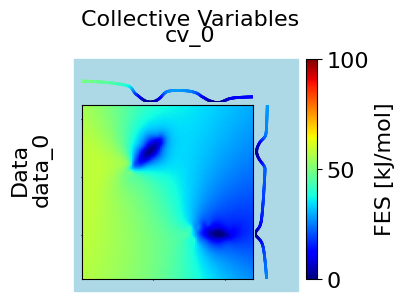

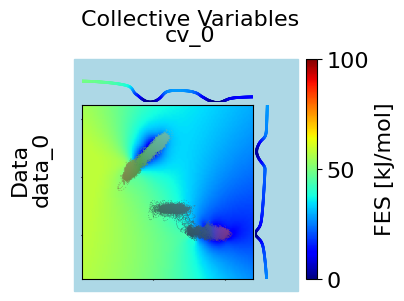

In [23]:
rounds.plot_round(
    c=0,
    r=2
)

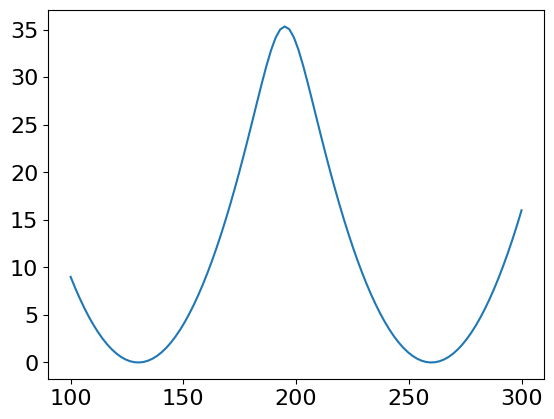

In [84]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from IMLCV.base.UnitsConstants import angstrom

x = jnp.linspace(100, 300, 100)


def f(V):
    return -10.0 * jnp.log(jnp.exp(-0.001 * (V - 130) ** 2) + jnp.exp(-0.001 * (V - 260.0) ** 2))
    

plt.plot(x, f(x))

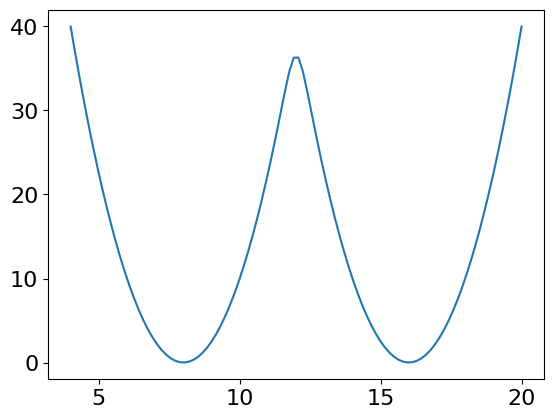

In [ ]:
aaa

In [115]:
(1.6*angstrom*2)**3

221.12942798224367

In [ ]:
(1.6*angstrom)**3

sigma


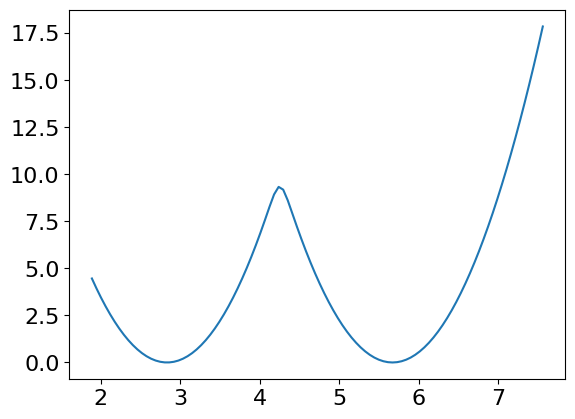

In [ ]:
x = jnp.linspace(1, 4, 100)*angstrom

sigma = 2 ** (-1 / 6)

print(f"sigma")


r0 = 1.5 * angstrom

def f(r,_):
  
    return -1*jnp.log( jnp.exp( - 5 * (r-r0)**2  ) + jnp.exp( -5* (r-2*r0)**2 ) )

  
    # r2 = jnp.sum(r**2)

    # r2_safe = jnp.where(r2 > 1e-7, r2, 1e-7)
    # return  4 * 4.0 * ((sigma**2 / r2_safe) ** 6 - (sigma**2 / r2_safe) ** 3)

plt.plot(x, jax.vmap(f)(x))

# plt.plot(x, jax.vmap(jax.grad(f))(x))

In [73]:
-10.0 * kjmol * jnp.log(jnp.exp(-0.5 * (V - 130) ** 2) + jnp.exp(-0.5 * (V - 260.0) ** 2))

NameError: name 'V' is not defined

In [ ]:
from IMLCV.examples.example_systems import toy_periodic_phase_trans